# Project Name: Light Lube Kinematic Viscosity at 40 degree Celsius Prediction

In this Project, will predict Light Lube Kinematic Viscosity at 40 degree Celsius with the help of Regression Models and then comparing the results i.e. which model is predicting much efficiently.

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Getting the Data

In [3]:
light_lube= pd.read_csv('datasets/lt lube kv@40 deg c csv.csv')
light_lube.head()

,KV at 40 deg C,Lt Lube Draw off Temp,Lt Lube Draw off Flow,Lube by pdt draw off flow,column temperature,column pressure,F206 HOT
0,3.6,159.5,-0.1,-0.1,58.8,32.2,333.8
1,6.2,181.6,-0.1,-0.1,46.0,44.7,257.7
2,3.5,175.1,35.3,14.4,64.3,98.7,262.0
3,8.2,173.2,36.9,13.7,43.6,32.7,332.7
4,3.6,147.6,65.5,7.4,55.2,34.0,335.1


# Exploratory Data Analysis

In [4]:
light_lube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   KV at 40 deg C             244 non-null    float64
 1   Lt Lube Draw off Temp      244 non-null    float64
 2   Lt Lube Draw off Flow      244 non-null    float64
 3   Lube by pdt draw off flow  244 non-null    float64
 4   column temperature         244 non-null    float64
 5   column pressure            244 non-null    float64
 6   F206 HOT                   244 non-null    float64
dtypes: float64(7)
memory usage: 13.5 KB


In [5]:
light_lube.describe()

,KV at 40 deg C,Lt Lube Draw off Temp,Lt Lube Draw off Flow,Lube by pdt draw off flow,column temperature,column pressure,F206 HOT
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,13.503689,231.291803,87.393443,40.245492,52.736475,53.159836,308.615574
std,10.851987,43.398635,50.265044,26.428045,10.699064,12.592526,29.486235
min,1.600000,130.900000,-0.100000,-0.100000,35.700000,32.200000,177.300000
25%,4.400000,195.050000,39.900000,20.000000,45.800000,44.650000,295.550000
50%,10.050000,228.800000,84.200000,35.100000,49.850000,49.250000,323.950000
75%,19.500000,270.775000,139.350000,59.175000,55.800000,58.200000,332.000000
max,55.500000,307.500000,163.400000,124.900000,117.100000,98.700000,339.900000


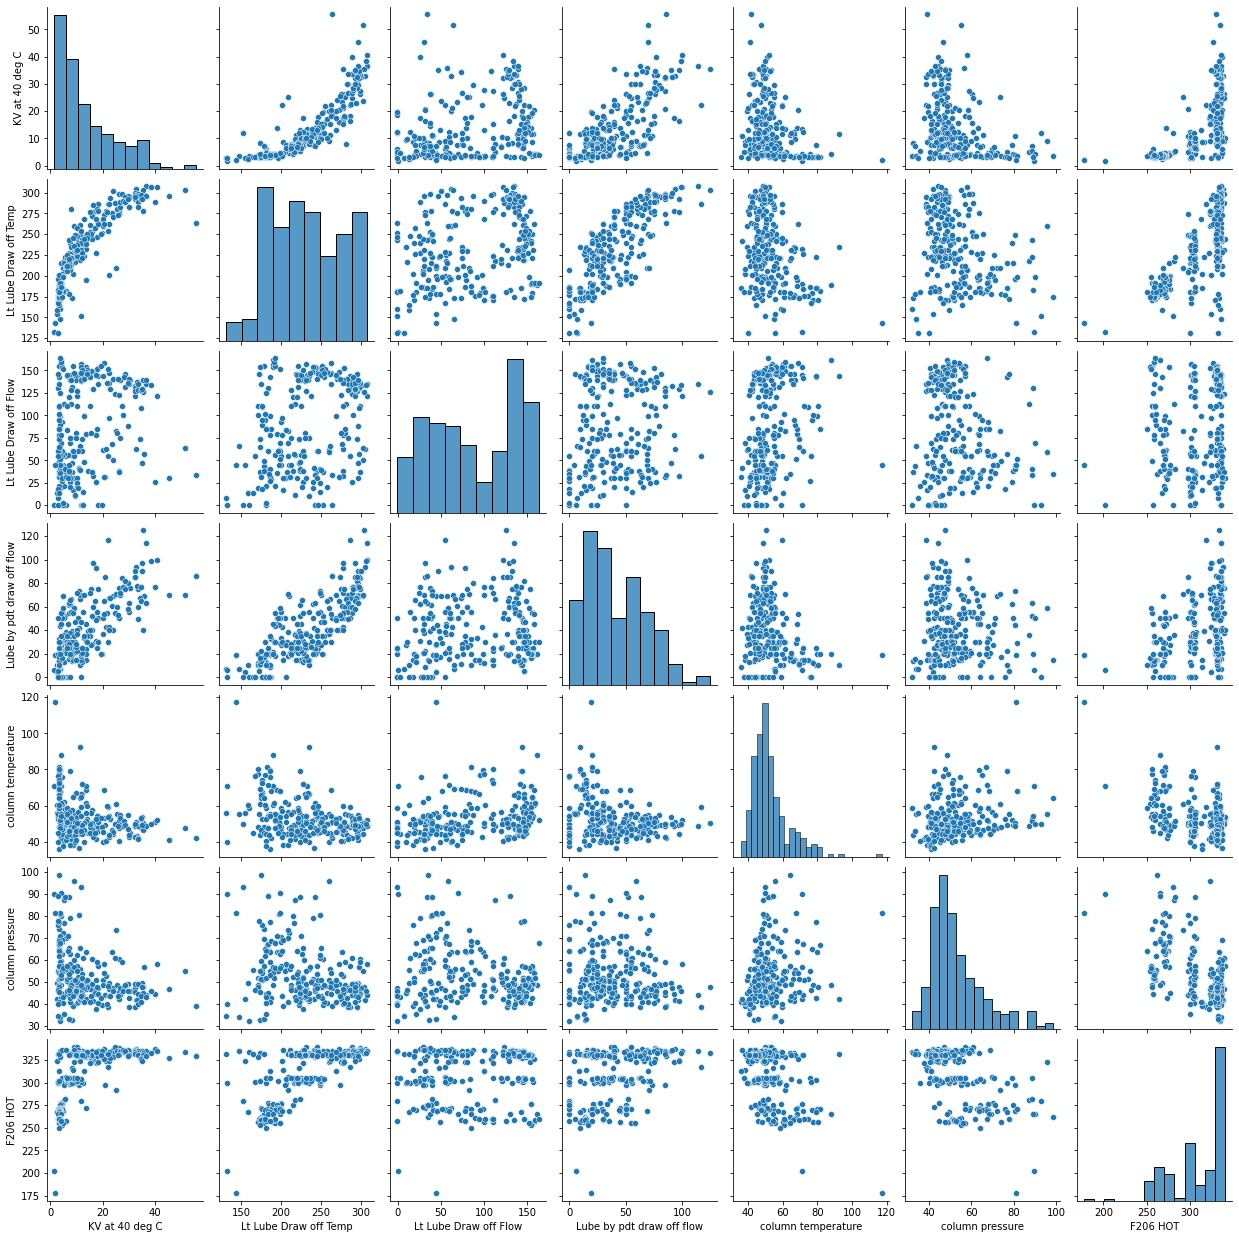

In [4]:
## Multivariate analysis

sns.pairplot(light_lube)

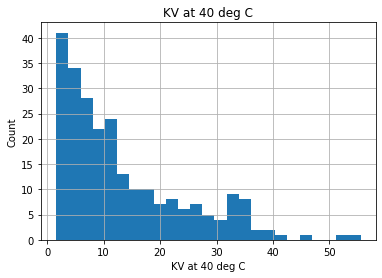

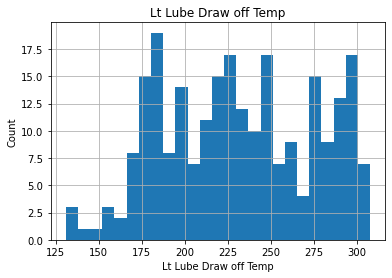

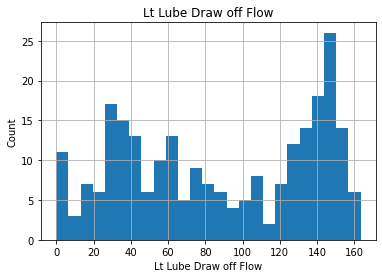

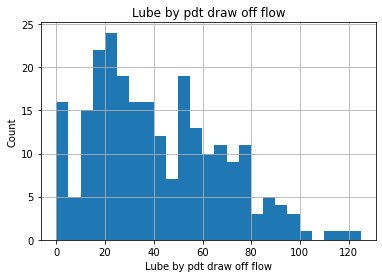

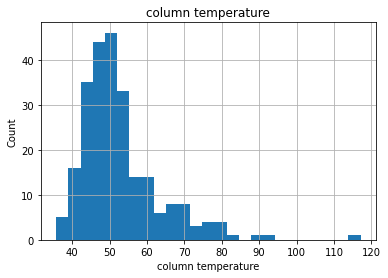

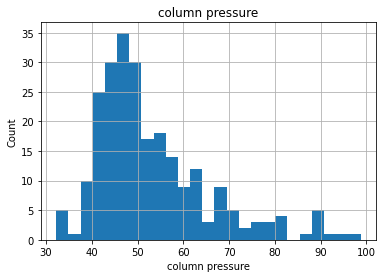

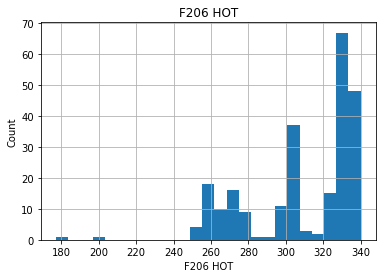

In [5]:
## Lets analyse the continuous values by creating histograms

for feature in light_lube.columns:
    data=light_lube.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [8]:
## without visulaization

light_lube.corr()

,KV at 40 deg C,Lt Lube Draw off Temp,Lt Lube Draw off Flow,Lube by pdt draw off flow,column temperature,column pressure,F206 HOT
KV at 40 deg C,1.000000,0.851814,0.239847,0.714108,-0.289076,-0.355168,0.611135
Lt Lube Draw off Temp,0.851814,1.000000,0.313620,0.796677,-0.355631,-0.308686,0.702673
Lt Lube Draw off Flow,0.239847,0.313620,1.000000,0.137155,0.229634,-0.210305,0.123273
Lube by pdt draw off flow,0.714108,0.796677,0.137155,1.000000,-0.283523,-0.073894,0.374311
column temperature,-0.289076,-0.355631,0.229634,-0.283523,1.000000,0.204909,-0.463033
column pressure,-0.355168,-0.308686,-0.210305,-0.073894,0.204909,1.000000,-0.562840
F206 HOT,0.611135,0.702673,0.123273,0.374311,-0.463033,-0.562840,1.000000


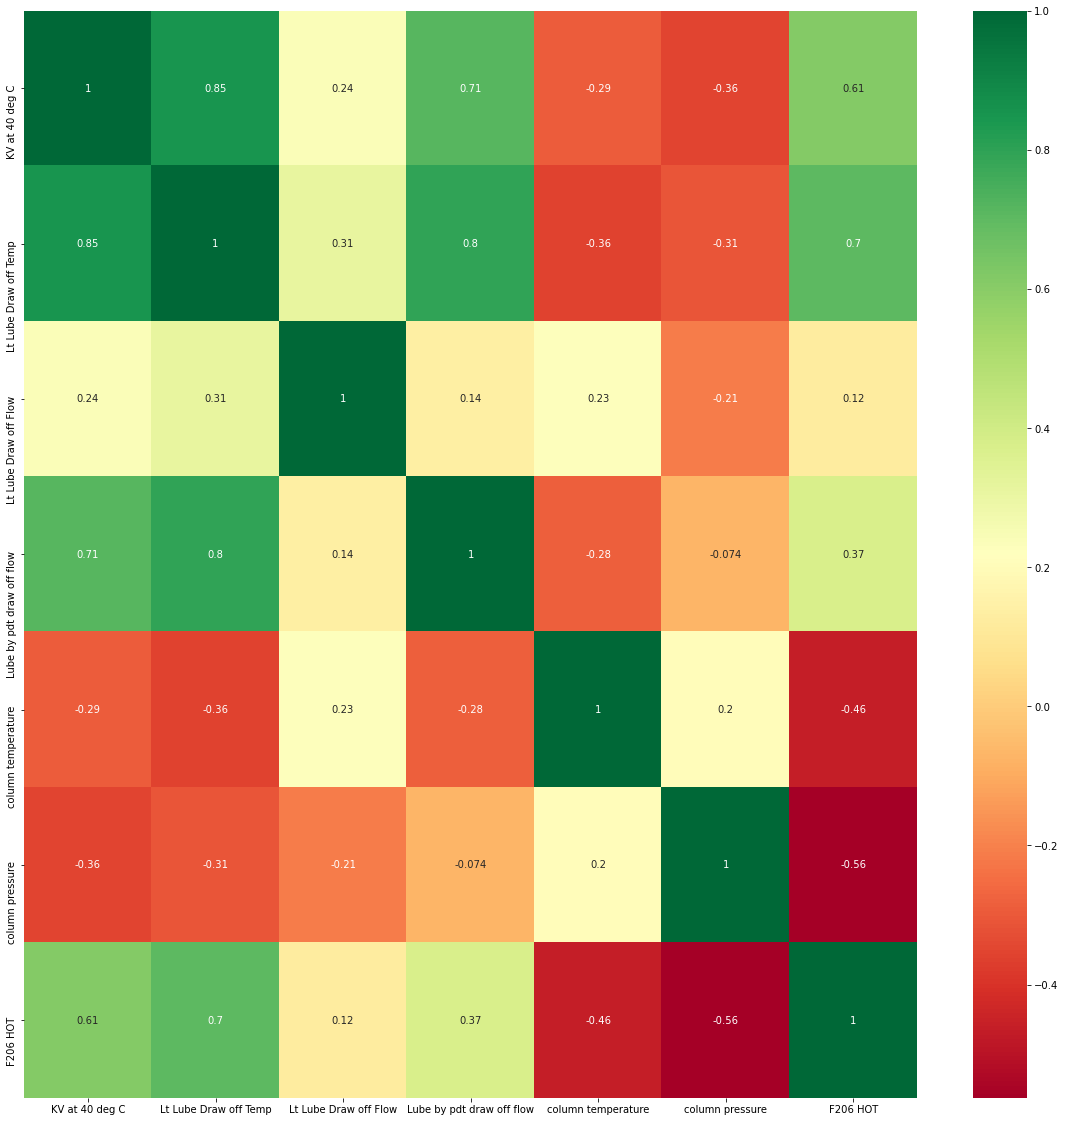

In [10]:
## Pearson Corelation using heatmap (seaborn)
corrmat = light_lube.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(light_lube[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Train Test Split

In [12]:
X_light= light_lube.iloc[:, 1:]
y_light= light_lube.iloc[:,0]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_light, y_light, random_state=0)

# Feature Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scale90d= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

# K Nearest Neighbors Regressor Model 

In [35]:
from sklearn.neighbors import KNeighborsRegressor

knnreg=KNeighborsRegressor(n_neighbors=20)

knnreg.fit(X_train,y_train)

y_pred_train= knnreg.predict(X_train)

y_pred_test= knnreg.predict(X_test)

score1= r2_score(y_train, y_pred_train)

score2= r2_score(y_test, y_pred_test)

error1= mean_squared_error(y_test,y_pred_test)
error2= mean_squared_error(y_test,y_pred_test, squared=False)
error3= mean_absolute_error(y_test,y_pred_test)

print('Evaluating the regression model:\n')
    
print('The Train Set R Square score for K Neighbors Regressor is {:.2f}'.format(score1))
print('The Test Set R Square score for K Neighbors Regressor is {:.2f}'.format(score2))
print('The mean_squared_error for K Neighbors Regressor using Ordinary Least Square is {:.2f}'.format(error1))
print('The root_mean_squared_error for K Neighbors Regressor using Ordinary Least Square is {:.2f}'.format(error2))
print('The mean_absolute_error for K Neighbors Regressor using Ordinary Least Square is {:.2f}\n'.format(error3))

print('Prediction Examples:\n')
z= knnreg.predict([[227.4,127,30.8,46.8,46.5,321]])

y= knnreg.predict([[244.1,151.7,30,46.1,47.1,325]])
for x in z:
    print('The Predicted KV@40 deg C for the desired parameters is {:.2f} and actual Target value taken from lab result is 10'.format(x))

for x in y:
    print('The Predicted KV@40 deg C for the desired parameters is {:.2f} and actual Target value taken from lab result is 15.7'.
          format(x))

Evaluating the regression model:

The Train Set R Square score for K Neighbors Regressor is 0.78
The Test Set R Square score for K Neighbors Regressor is 0.83
The mean_squared_error for K Neighbors Regressor using Ordinary Least Square is 18.06
The root_mean_squared_error for K Neighbors Regressor using Ordinary Least Square is 4.25
The mean_absolute_error for K Neighbors Regressor using Ordinary Least Square is 2.88

Prediction Examples:

The Predicted KV@40 deg C for the desired parameters is 9.69 and actual Target value taken from lab result is 10
The Predicted KV@40 deg C for the desired parameters is 14.15 and actual Target value taken from lab result is 15.7


# Linear Regression: Ordinary Least Squares Model

In [38]:
from sklearn.linear_model import LinearRegression

linreg= LinearRegression().fit(X_train,y_train)

y_pred= linreg.predict(X_test)

score= r2_score(y_test, y_pred)

error1= mean_squared_error(y_test,y_pred)
error2= mean_squared_error(y_test,y_pred, squared=False)
error3= mean_absolute_error(y_test,y_pred)

print('Evaluating the regression model:\n')
    

print('The R Square score for Linear Regression using Ordinary Least Square is {:.2f}'.format(score))
print('The mean_squared_error for Linear Regression using Ordinary Least Square is {:.2f}'.format(error1))
print('The root_mean_squared_error for Linear Regression using Ordinary Least Square is {:.2f}'.format(error2))
print('The mean_absolute_error for Linear Regression using Ordinary Least Square is {:.2f}\n'.format(error3))

print('The model coefficients are {}'.format(linreg.coef_))
print('The model intercept is {:.3f}\n'.format(linreg.intercept_))

Evaluating the regression model:

The R Square score for Linear Regression using Ordinary Least Square is 0.75
The mean_squared_error for Linear Regression using Ordinary Least Square is 26.23
The root_mean_squared_error for Linear Regression using Ordinary Least Square is 5.12
The mean_absolute_error for Linear Regression using Ordinary Least Square is 3.75

The model coefficients are [ 0.18647326 -0.02041523  0.07885482  0.05962033 -0.15796738 -0.02364493]
The model intercept is -18.116



# Linear Regression: Ridge Model

In [66]:
from sklearn.linear_model import Ridge

linridge= Ridge(alpha=50000).fit(X_train,y_train)

y_pred= linridge.predict(X_test)

score= r2_score(y_test, y_pred)

error1= mean_squared_error(y_test,y_pred)
error2= mean_squared_error(y_test,y_pred, squared=False)
error3= mean_absolute_error(y_test,y_pred)

print('Evaluating the regression model:\n')
    

print('The R Square score for Linear Regression using Ridge is {:.2f}'.format(score))
print('The mean_squared_error for Linear Regression using Ridge is {:.2f}'.format(error1))
print('The root_mean_squared_error for Linear Regression using Ridge is {:.2f}'.format(error2))
print('The mean_absolute_error for Linear Regression using Ridge is {:.2f}\n'.format(error3))

print('The model coefficients are {}'.format(linridge.coef_))
print('The model intercept is {:.3f}\n'.format(linridge.intercept_))

Evaluating the regression model:

The R Square score for Linear Regression using Ridge is 0.79
The mean_squared_error for Linear Regression using Ridge is 22.26
The root_mean_squared_error for Linear Regression using Ridge is 4.72
The mean_absolute_error for Linear Regression using Ridge is 3.62

The model coefficients are [ 0.13793504 -0.00065578  0.07822924  0.00293354 -0.04253525  0.03070451]
The model intercept is -28.682



# Linear Regression: Lasso Model

In [83]:
from sklearn.linear_model import Lasso

linlasso= Lasso(alpha=27).fit(X_train,y_train)

y_pred= linlasso.predict(X_test)

score= r2_score(y_test, y_pred)

error1= mean_squared_error(y_test,y_pred)
error2= mean_squared_error(y_test,y_pred, squared=False)
error3= mean_absolute_error(y_test,y_pred)

print('Evaluating the regression model:\n')
    

print('The R Square score for Linear Regression using Lasso is {:.2f}'.format(score))
print('The mean_squared_error for Linear Regression using Lasso is {:.2f}'.format(error1))
print('The root_mean_squared_error for Linear Regression using Lasso is {:.2f}'.format(error2))
print('The mean_absolute_error for Linear Regression using Lasso is {:.2f}\n'.format(error3))

print('The model coefficients are {}'.format(linlasso.coef_))
print('The model intercept is {:.3f}\n'.format(linlasso.intercept_))

print('Important Features that Lasso has selected for predicting the output variables are:\n')

for (e,k) in sorted (list(zip(list(X_light), linlasso.coef_))):
    if k != 0:
        print('\t{}, {:.3f}'.format(e, k))

Evaluating the regression model:

The R Square score for Linear Regression using Lasso is 0.79
The mean_squared_error for Linear Regression using Lasso is 21.57
The root_mean_squared_error for Linear Regression using Lasso is 4.64
The mean_absolute_error for Linear Regression using Lasso is 3.70

The model coefficients are [ 0.1995595  -0.          0.00121205 -0.         -0.          0.        ]
The model intercept is -32.519

Important Features that Lasso has selected for predicting the output variables are:

	Lt Lube Draw off Temp, 0.200
	Lube by pdt draw off flow, 0.001


# Observations

- RMSE comparsion between models: KNN detected 4.15 vs LR detected 5.12 vs Ridge detected 4.72 errors vs Lasso detected 4.64.
- KNN accuracy is around 83% higher than LR 75% and Ridge and Lasso (79% each)
- MSE and MAE of KNN is less as compared to all other models.
- So overall KNRegressor Method performed much better in determining KV of Light Lube Product.